In [1]:
# Python standard library
import csv
import sys

# Scientific computing
import numpy as np
import scipy
import scipy.interpolate

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Pore stats
sys.path.append('C:/Users/SiwyLab/Desktop/pore_stats/pore_stats/oi')
import optical_imaging as oi
import oi_file

In [2]:
date = '11-10-2017'
particle = 'HCT-116_0'
channel = '10-20-10_0'
file_index = '0'

base_path = oi_file.data_base_path

oi_vid_file_path = base_path + date + '/' + particle + '/' + channel + '/oi/bin/test_camera_' + file_index
oi_events_file_path = base_path + date + '/' + particle + '/' + channel + '/oi/events/test_camera_' + file_index + '_events.json'

In [3]:
# Load video
oi_res_x = 384
oi_res_y = 112
oi_fps = 250000.

oi_vid = oi_file.Video(oi_vid_file_path, oi_res_x, oi_res_y, oi_fps)

# Load events
oi_events = oi_file.open_event_file_json(oi_events_file_path)

[ 0.00858337  0.99996316]


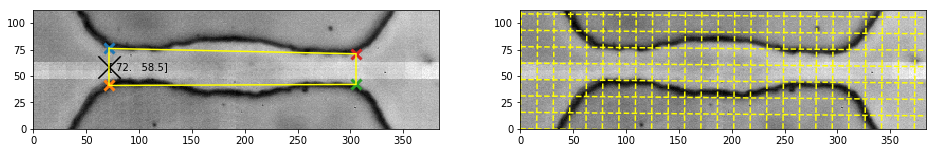

In [4]:
reload(oi)

template_index = 100

template_frame = oi_vid.get_frame(template_index)

stage_file_path = base_path + date +'/'+ particle +'/'+ channel + '/oi/stage/stage_' + file_index + '.txt'
cs = oi.load_stage_file(stage_file_path)

c0 = cs[0]
c1 = cs[1]
c2 = cs[2]
c3 = cs[3]

oi_stage = oi.Stage(template_frame, c0, c1, c2, c3)
oi_stage.plot_stage()

In [5]:
oi_ellipse_base_path = oi_file.ellipse_base_path
oi_ellipse_path = oi_ellipse_base_path + '/'+ date + '/'+ particle + '/' + channel + '/' + file_index + '/ellipses.txt'

ellipsess = []


with open(oi_ellipse_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = '\t')
    
    # Skip header
    header_length = 2
    for i in range(header_length):
        next(file_reader)
        
        
    for row in file_reader:
        
        if row[0] == 'event #':
            # New event
            ellipsess.append([])
            continue
            
        else:
            ellipse = []
            for ele in row:
                try:
                    ellipse.append(float(ele))
                except:
                    ellipse.append(0)
                    
            ellipsess[-1].append(ellipse)

In [6]:
# Load keep indices
filter_file_path = oi_ellipse_base_path +'/'+ date+'/' + particle +'/'+ channel +'/' +file_index + '/filter'

with open(filter_file_path, 'r') as filter_file_handle:
    filter_file_reader = csv.reader(filter_file_handle, delimiter = '\t')
    for row in filter_file_reader:
        if row[0] == 'events':
            keep_indices = [int(ele) for ele in row[1:]]

print 'loaded keep indices (', len(keep_indices), 'events total):\n', keep_indices

loaded keep indices ( 228 events total):
[5, 9, 11, 18, 20, 22, 32, 38, 39, 43, 45, 50, 51, 52, 54, 56, 61, 66, 68, 74, 81, 87, 89, 91, 92, 96, 102, 119, 136, 139, 143, 144, 148, 151, 152, 154, 155, 157, 158, 163, 165, 168, 173, 181, 185, 187, 188, 191, 192, 193, 194, 195, 199, 204, 213, 219, 223, 225, 230, 231, 236, 243, 248, 249, 251, 252, 253, 256, 258, 260, 266, 269, 273, 275, 280, 281, 283, 284, 288, 290, 291, 298, 304, 305, 308, 309, 312, 314, 316, 317, 318, 321, 323, 325, 327, 328, 331, 332, 336, 342, 343, 347, 348, 350, 351, 352, 354, 357, 359, 361, 362, 368, 369, 370, 375, 376, 378, 380, 390, 395, 396, 399, 405, 408, 414, 417, 420, 421, 423, 424, 426, 428, 430, 431, 432, 436, 442, 443, 448, 453, 459, 466, 472, 473, 477, 478, 480, 486, 488, 491, 495, 498, 499, 503, 504, 505, 510, 511, 513, 514, 515, 522, 523, 525, 530, 542, 548, 550, 551, 552, 554, 555, 558, 560, 561, 563, 564, 567, 568, 573, 574, 575, 577, 582, 587, 590, 591, 592, 593, 594, 598, 604, 606, 610, 613, 621, 622, 6

In [49]:
filtered_oi_events = [oi_events[i] for i in range(len(oi_events)) if i in keep_indices]
filtered_ellipsess = [ellipsess[i] for i in range(len(ellipsess)) if i in keep_indices]

In [50]:
oi_events = filtered_oi_events
ellipsess = filtered_ellipsess

In [51]:
print len(ellipsess)
print len(oi_events)

228
228


In [52]:
calculations_file_path = oi_ellipse_base_path+ '/' + '/'+date+'/' + particle+'/' + channel+'/' + file_index + '/calculations'



with open(calculations_file_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    header = file_reader.next()
    
calculations = np.genfromtxt(calculations_file_path, delimiter = ',', skip_header = 1)    

header_dict = {header[i]:i for i in range(len(header))}

In [53]:
save = False

In [91]:
base_path = oi_ellipse_base_path

num_files = 2
dates = ['11-10-2017','10-10-2017']
particles = ['HCT-116_0']*num_files
channels = ['10-20-10_0','10-20-10_3']
indices = ['0']*num_files


calculations_file_paths = [base_path + dates[i] + '/' + particles[i] + '/' + channels[i] + '/' + indices[i] + '/' + 'calculations' for i in range(num_files)]



with open(calculations_file_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    header = file_reader.next()
    
header_dict = {header[i]:i for i in range(len(header))}
    
    
calculationss = []
for i in range(num_files):
    calculations = np.genfromtxt(calculations_file_paths[i], delimiter = ',', skip_header = 1)    
    calculationss.append(calculations)
    
num_events = []
for i in range(num_files):
    num_events.append(int(np.max(calculationss[i][:,0])))
    


In [92]:
avg_radius_pixss = []
avg_radius_umss = []

outside_aspectss = []
narrow_aspectss = []
cavity_aspectss = []

for i in range(num_files):
    print i
    
    avg_radius_pixs = []
    avg_radius_ums = []
    
    outside_aspects = []
    narrow_aspects = []
    cavity_aspects = []
    
    calculations = np.copy(calculationss[i])

    
    
    for j in range(num_events[i]):

        event_calculations = np.copy(calculations[calculations[:,header_dict['event_num']] == j])



        xc_ums = np.copy(event_calculations[:,header_dict['xc_um']])
        aspects = np.copy(event_calculations[:,header_dict['aspect-ratio']])
        radii_pix = np.copy(event_calculations[:,header_dict['r_pix']])
        radii_um = np.copy(event_calculations[:,header_dict['r_um']])

        avg_aspect = np.mean(aspects)
        avg_radius_pix = radii_pix[(xc_ums > -50) & (xc_ums < 0)][0]
        avg_radius_um = radii_um[(xc_ums > -50) & (xc_ums < 0)][0]
        outside_aspect = np.mean(aspects[(xc_ums > -50) & (xc_ums < 0)])
        narrow_aspect = np.mean(aspects[(xc_ums > 0) & (xc_ums < 40)])
        cavity_aspect = np.mean(aspects[(xc_ums > 60) & (xc_ums < 90)])

        
        avg_radius_pixs.append(avg_radius_pix)
        avg_radius_ums.append(avg_radius_um)
        outside_aspects.append(outside_aspect)
        narrow_aspects.append(narrow_aspect)
        cavity_aspects.append(cavity_aspect)



        
    avg_radius_pixss.append(avg_radius_pixs)
    avg_radius_umss.append(avg_radius_ums)
    
    outside_aspectss.append(outside_aspects)
    narrow_aspectss.append(narrow_aspects)
    cavity_aspectss.append(cavity_aspects)

0
1


In [93]:
for i in range(num_files):
    avg_radius_pixss[i] = np.array(avg_radius_pixss[i])
    avg_radius_umss[i] = np.array(avg_radius_umss[i])
    
    outside_aspectss[i] = np.array(outside_aspectss[i])
    narrow_aspectss[i] = np.array(narrow_aspectss[i])
    cavity_aspectss[i] = np.array(cavity_aspectss[i])

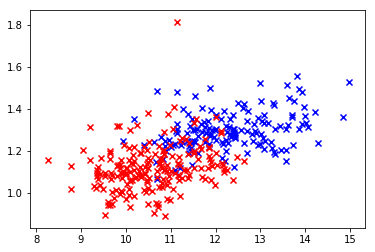

In [94]:
for i in range(num_files):
    if i == 0:
        color = 'blue'
        marker = 'x'
    else:
        color = 'red'
        marker = 'x'
    plt.scatter(avg_radius_pixss[i], narrow_aspectss[i], marker = marker, color = color, lw = 1.5)
    #sns.kdeplot(avg_radius_pixss[i], narrow_aspectss[i], cmap = 'Reds')
    
plt.show()

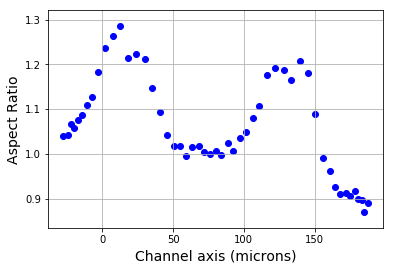

In [77]:
plt.scatter(,aspects, marker = 'o', color = 'blue')
plt.xlabel('Channel axis (microns)', size = 14)
plt.ylabel('Aspect Ratio', size = 14)
#sns.kdeplot(xc_ums,aspects, cmap = 'Blues')
#
#plt.scatter(avg_radius_pixs, outside_aspects, marker = 'x', color = 'red')
#sns.kdeplot(avg_radius_pixs, outside_aspects, cmap = 'Reds')

#plt.scatter(avg_radius_pixs, cavity_aspects, marker = 'x', color = 'red')
#sns.kdeplot(avg_radius_pixs, cavity_aspects, cmap = 'Reds')

plt.grid()

#plt.savefig('C://Users/SiwyLab/Desktop/hct.png')

plt.show()